In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import itertools as it
import scipy.io.wavfile as wavfile
import importlib
from utils import general_utils, audio_utils
importlib.reload(audio_utils)
importlib.reload(general_utils)
tf.enable_eager_execution()


Using TensorFlow backend.
W0922 13:53:02.809380 4622779840 deprecation_wrapper.py:119] From /Users/samwachtel/git/udacity/udacity_capstone/utils/general_utils.py:15: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.



In [5]:
importlib.reload(audio_utils)
importlib.reload(general_utils)
#testData = tf.data.TFRecordDataset("data/nsynth-test.tfrecord")
tf_record_file = "data/nsynth-test.tfrecord"
#general_utils.list_data_in_tfrecord(tf_record_file, 2)

audio_name = 'vocal_acoustic_000-064-075'
general_utils.get_data_from_tfrecord_by_note_str(audio_name, tf_record_file)

found the file:  vocal_acoustic_000-064-075


{'audio': array([[-1.7977802e-05,  5.2617561e-05,  3.7967369e-05, ...,
          1.9680847e-05, -1.9699957e-05,  1.9492341e-05]], dtype=float32),
 'instrument': array([46]),
 'instrument_family': array([[10]]),
 'instrument_family_str': array([b'vocal'], dtype=object),
 'instrument_source': array([[0]]),
 'instrument_source_str': array([b'acoustic'], dtype=object),
 'instrument_str': array([b'vocal_acoustic_000'], dtype=object),
 'note': array([[12425]]),
 'note_str': array([b'vocal_acoustic_000-064-075'], dtype=object),
 'pitch': array([[64]]),
 'qualities': array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]),
 'sample_rate': array([16000]),
 'velocity': array([[75]])}

# Display a waveform from a single example

found the file:  vocal_acoustic_000-064-075
Number of samples: 64000
Min sample: -0.86985993
Max sample: 1.0
Audio Data:  [-1.7977802e-05  5.2617561e-05  3.7967369e-05 ...  1.9680847e-05
 -1.9699957e-05  1.9492341e-05]
Sample Rate:  16000
Sample lengh (seconds):  4.0


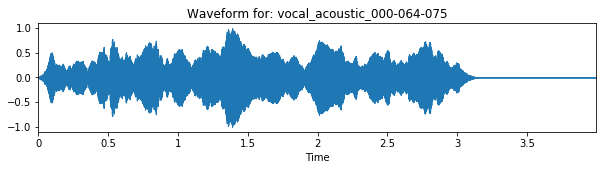

In [100]:
importlib.reload(audio_utils)
importlib.reload(general_utils)
audio_name = 'vocal_acoustic_000-064-075'
audio_data, sr, name = audio_utils.get_audio_sample_by_name_from_tfrecord(audio_name,'data/nsynth-test.tfrecord')
sample_rate = sr[0]
print('Number of samples:', len(audio_data))
print('Min sample:', min(audio_data))
print('Max sample:', max(audio_data))
print('Audio Data: ', audio_data)
print('Sample Rate: ', sample_rate)
print('Sample lengh (seconds): ', len(audio_data) / sample_rate)
audio_utils.graph_waveform(audio_data, audio_name, sample_rate)


In [87]:
# unpack some spectograms
#audio_utils.write_spectograms_parallelized('data/nsynth-test.tfrecord', 'data/nsynth-test-spectrograms', 200)

Number of samples: 88200
Min sample: -0.691776
Max sample: 0.79340106
Audio Data:  [ 3.3573386e-07 -4.2254642e-06  1.3006766e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Sample Rate:  22050
Sample lengh (seconds):  4.0


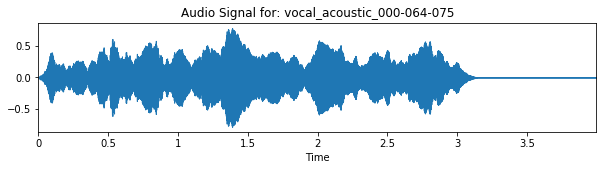

In [131]:
## a test to see what the original wav file looks like
#### LOOKS THE SAME
audio_file_name = 'vocal_acoustic_000-064-075.wav'
sample_audio_data, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name)
print('Number of samples:', len(sample_audio_data))
print('Min sample:', min(sample_audio_data))
print('Max sample:', max(sample_audio_data))
print('Audio Data: ', sample_audio_data)
print('Sample Rate: ', sr)
print('Sample lengh (seconds): ', len(sample_audio_data) / sr)
audio_utils.graph_wav(sample_audio_data, audio_name, sr)

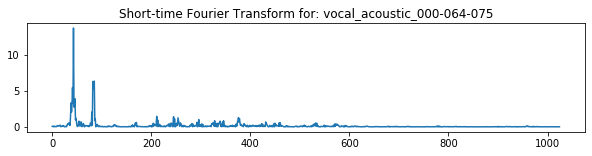

In [63]:
## Short-time Fourier transform (STFT)
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_utils.graph_stft(audio_data, audio_name)

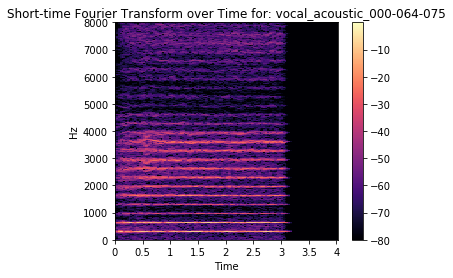

In [71]:
## Short-time Fourier transform (STFT) Over Time
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_utils.graph_time_stft(audio_data, audio_name, sample_rate)

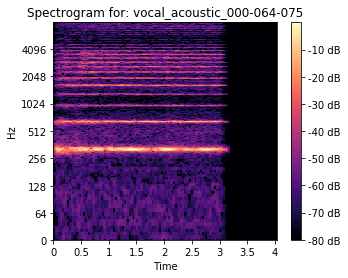

In [114]:
## Short-time Fourier Transform (STFT) Over Time
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_utils.create_spectrogram_non_mel(audio_data, audio_name, sample_rate)

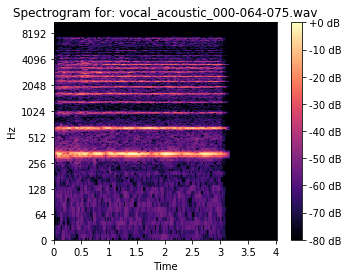

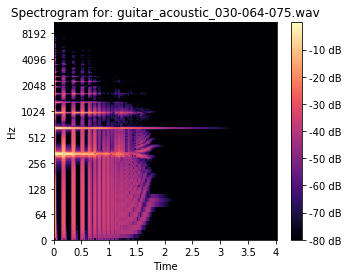

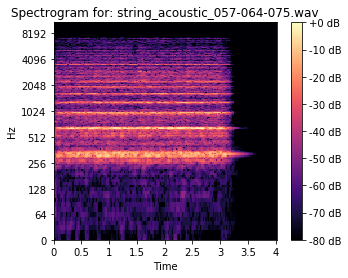

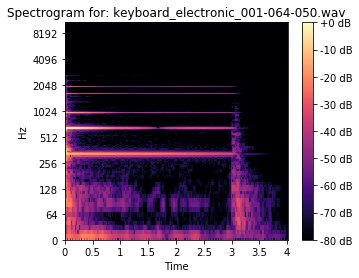

In [130]:
## Short-time Fourier Transform (STFT) Over Time
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_file_name_comp = 'vocal_acoustic_000-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram_non_mel(sample_audio_data_comp, audio_file_name_comp, sr)

audio_file_name_comp = 'guitar_acoustic_030-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram_non_mel(sample_audio_data_comp, audio_file_name_comp, sr)

audio_file_name_comp = 'string_acoustic_057-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram_non_mel(sample_audio_data_comp, audio_file_name_comp, sr)

audio_file_name_comp = 'keyboard_electronic_001-064-050.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram_non_mel(sample_audio_data_comp, audio_file_name_comp, sr)


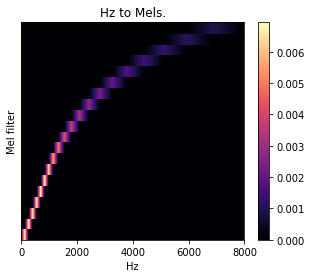

In [60]:
## To get a sense of how the Mel Spectrogram converts Hz to Mels 
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_utils.create_mel_to_hz_plot(sample_rate)

<module 'matplotlib.pyplot' from '/anaconda3/envs/magenta/lib/python3.7/site-packages/matplotlib/pyplot.py'>

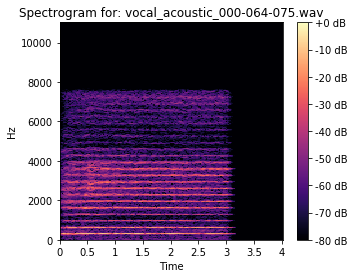

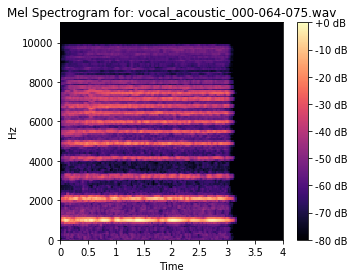

In [176]:
## and a look at the spectogram for the same file (vocal_acoustic_000-064-075.wav)
importlib.reload(audio_utils)
importlib.reload(general_utils)

audio_file_name_comp = 'vocal_acoustic_000-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram(sample_audio_data_comp, audio_file_name_comp, sr, mel=False, spect_only=False)

audio_file_name_comp = 'vocal_acoustic_000-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram(sample_audio_data_comp, audio_file_name_comp, sr, mel=True, spect_only=False)

In [183]:
importlib.reload(audio_utils)

audio_file_name_comp = 'vocal_acoustic_000-064-075.wav'
sample_audio_data_comp, sr = audio_utils.get_sound_file_data('data/test_sample/nsynth-test/audio/'+audio_file_name_comp)

audio_utils.create_spectrogram_parallelized(sample_audio_data_comp, sr,
                                'vocal_acoustic_000-064-075', 'data',
                                1, 1, 1, 1, False)

(3, 1, 1)

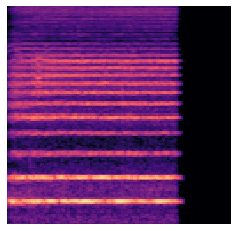

In [97]:
## and a look at the spectogram for the generated file
importlib.reload(general_utils)

general_utils.display_image('data/nsynth-test-spectrograms/vocal/vocal_acoustic_000-064-075.jpg')